In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')


In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
X = dataset.iloc[:, [3, 4]].values

In [5]:
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(n_clusters=8, eigen_solver=None, random_state=None, n_init=10, gamma=1.0, affinity='rbf',
                                n_neighbors=10, eigen_tol=0.0, assign_labels='kmeans', degree=3,coef0=1, kernel_params=None, n_jobs=None)
labels = clustering.fit_predict(X)


C:\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:392: UserWarning: Exited at iteration 2000 with accuracies 
[4.59354642e-14 2.41560187e-07 4.23909682e-07 5.02463880e-07
 2.77244847e-06 2.94474587e-06 1.92483650e-06 6.79379771e-07
 1.80342082e-05]
not reaching the requested tolerance 2.9802322387695312e-06.
Use iteration 1784 instead with accuracy 
1.218615090562372e-06.

  _, diffusion_map = lobpcg(
C:\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:392: UserWarning: Exited postprocessing with accuracies 
[1.49493212e-14 2.21371330e-07 4.31926528e-07 4.51562942e-07
 1.55185013e-06 2.70831510e-06 1.63618162e-06 6.75692118e-07
 3.29063580e-06]
not reaching the requested tolerance 2.9802322387695312e-06.
  _, diffusion_map = lobpcg(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting th

In [6]:
supervised=pd.DataFrame(dataset)

In [7]:
supervised["cluster_group"]=labels

In [8]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,3
197,198,Male,32,126,74,0
198,199,Male,32,137,18,1


C:\anaconda3\Lib\site-packages\seaborn\regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
C:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


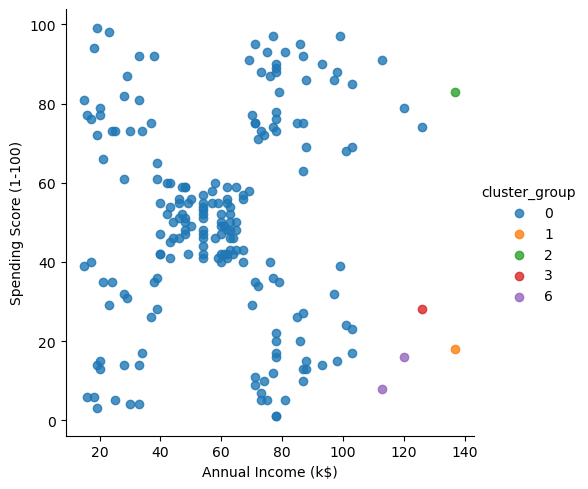

In [9]:
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5], 
                   fit_reg=False, legend=True, legend_out=True)